## Anotações:
### Verificar se os dados estão balanceados, pois se trata de um problema de classificação
### Os dados estão todos codificados, então não há porque fazer uma análise exploratória
### Existem muitas variáveis, considerar usar redução de dimensionalidade
### Testar os algoritmos com validação cruzada e construir boxplots com os resultados
### Testar se feature selection melhora o modelo

## 1 = insatisfeito, 0 = satisfeito

In [28]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [71]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
df.shape

(76020, 371)

In [53]:
df.isnull().sum()

var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0                       0
ind_var8                         0
ind_var12_0                      0
ind_var12           

## A coluna ID é inútil

In [72]:
df = df.iloc[:,1:]

In [67]:
df.dtypes

imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var5_0                         int64
ind_var5                           int64
ind_var6_0                         int64
ind_var6                           int64
ind_var8_0                         int64
ind_var8        

In [68]:
pd.set_option('max_row',None)

In [73]:
unicos = pd.DataFrame(df.nunique())

In [74]:
unicos.loc[unicos[0]==1].index

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3',
       'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

## Algumas colunas só tem um valor único, e por isso podem ser descartadas

In [75]:
df.drop(list(unicos.loc[unicos[0]==1].index),axis=1,inplace=True)

In [76]:
unicos.sort_values(0,ascending=False)

,0
var38,57736
saldo_medio_var5_ult3,17330
saldo_var30,16940
saldo_var42,15730
saldo_medio_var5_ult1,14778
saldo_medio_var5_hace2,14486
saldo_var5,11642
imp_op_var39_comer_ult3,9099
imp_op_var41_comer_ult3,8961
imp_op_var39_ult1,8149


## A coluna var38 tem 57736 valores únicos, sendo que há 76020 linhas. Avaliar se preciso apagar ela

In [77]:
df.duplicated().sum()

4807

## Removendo duplicatas

In [78]:
df.drop_duplicates(inplace=True)

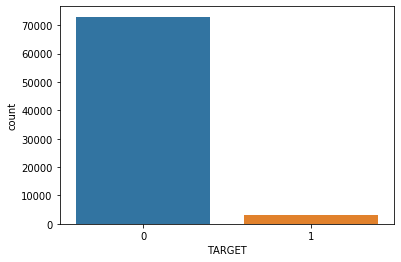

In [13]:
sns.countplot(data=df,x='TARGET');

## Extremamente desbalanceado

## Posso esperar que haja um desempenho muito melhor na identificação da classe 0 do que na classe 1

## Posso tentar um balanceamento por undersampling (Tomek links)

## É preciso normalizar os dados antes de aplicar PCA

In [79]:
x_values = df.iloc[:,0:df.shape[1]].values
y_values = df.iloc[:,df.shape[1]-1].values

In [80]:
min_max = MinMaxScaler()
min_max.fit(x_values)
x_values_s = min_max.transform(x_values)

In [81]:
x_values_s

array([[0.99976406, 0.18      , 0.        , ..., 0.        , 0.00154526,
        0.        ],
       [0.99976406, 0.29      , 0.        , ..., 0.        , 0.0020025 ,
        0.        ],
       [0.99976406, 0.18      , 0.        , ..., 0.        , 0.00282212,
        0.        ],
       ...,
       [0.99976406, 0.34      , 0.        , ..., 0.        , 0.00515084,
        0.        ],
       [0.99976406, 0.18      , 0.        , ..., 0.        , 0.003126  ,
        0.        ],
       [0.99976406, 0.2       , 0.        , ..., 0.        , 0.00359128,
        0.        ]])

In [82]:
pca = PCA(n_components=50)
pca.fit(x_values_s)
x_componentes = pca_fit.transform(x_values_s)

In [83]:
pca_fit.explained_variance_ratio_.sum()

0.9921693943006986

In [84]:
x_componentes.shape

(71213, 50)

## 50 componentes explicam praticamente toda a informação (99,2%)

## Fazendo testes sem balanceamento com validação cruzada

## RandomForest, Regressão logística, SVM, NaiveBayes, LDA, KNN, XGBClassifier

In [89]:
kf = KFold(n_splits=10, shuffle=True)

In [123]:
modelos = [('RandomForest',RandomForestClassifier()),('KNN',KNeighborsClassifier()),('Reg. L.',LogisticRegression()),\
          ('SVM',SVC()),('NB',GaussianNB()),('LDA',LinearDiscriminantAnalysis()),('XGBoost',XGBClassifier())]

In [ ]:
resultados = []
for _,modelo in modelos:
    resultados.append(cross_val_score(estimator=modelo,X=x_componentes,y=y_values,cv=kf,scoring='balanced_accuracy'))

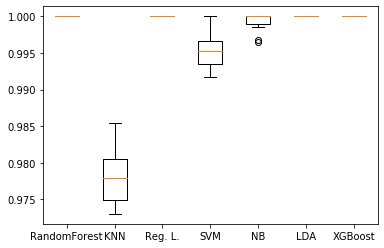

In [125]:
plt.boxplot(x=resultados,labels=[x[0] for x in modelos]);

## Os modelos RandomForest, Regressão Logística, LDA e XGBoost preveram perfeitamente.

## Testando os modelos que se saíram melhor individualmente para coletar as acurácias por classe

In [85]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_componentes,y_values,test_size=0.3,random_state=2)

In [86]:
x_treino.shape,x_teste.shape

((49849, 50), (21364, 50))

In [87]:
randf = RandomForestClassifier()
randf.fit(x_treino,y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
prev_randf = randf.predict(x_teste)

In [89]:
print(classification_report(y_teste,prev_randf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20536
           1       1.00      1.00      1.00       828

    accuracy                           1.00     21364
   macro avg       1.00      1.00      1.00     21364
weighted avg       1.00      1.00      1.00     21364



## O Random Forest já prevê perfeitamente, não há porque ir em frente